In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('../data/breast_cancer.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


In [3]:
values = df.to_numpy()
x = values[:, 0:10]
y = values[:, 10]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(x_train)
normalized_x_train = scaler.transform(x_train)
normalized_x_test = scaler.transform(x_test)

In [4]:
pca = PCA(n_components=2)
pca.fit(normalized_x_train)
x_train_proj = pca.transform(normalized_x_train)
x_test_proj = pca.transform(normalized_x_test)
pca_train_1 = x_train_proj[:, 0]
pca_train_2 = x_train_proj[:, 1]
pca_test_1 = x_test_proj[:, 0]
pca_test_2 = x_test_proj[:, 1]

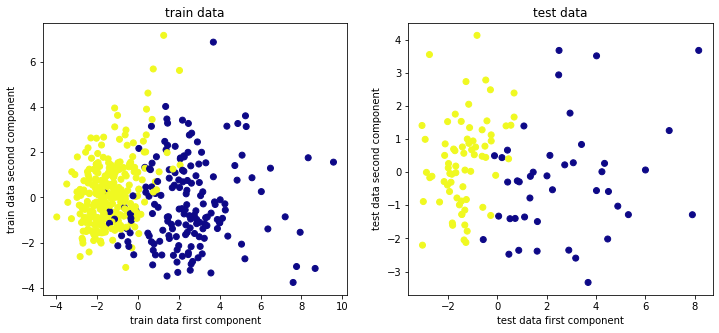

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('train data')
plt.scatter(pca_train_1, pca_train_2, c=y_train, cmap='plasma')
plt.xlabel('train data first component')
plt.ylabel('train data second component')

plt.subplot(1, 2, 2)
plt.title('test data')
plt.scatter(pca_test_1, pca_test_2, c=y_test, cmap='plasma')
plt.xlabel('test data first component')
plt.ylabel('test data second component')

plt.show()

In [6]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(normalized_x_train, y_train)
y_predict_without_dimension_reduction = knn.predict(normalized_x_test)
print('accuracy before dimension reduction is:', accuracy_score(y_test, y_predict_without_dimension_reduction))
df_without_dimension_reduction = pd.DataFrame(normalized_x_test)
df_without_dimension_reduction['label'] = y_test
df_without_dimension_reduction['predict'] = y_predict_without_dimension_reduction
df_without_dimension_reduction

accuracy before dimension reduction is: 0.9736842105263158


,0,1,2,3,4,5,6,7,8,9,label,predict
0,-0.466497,-0.137289,-0.444211,-0.486465,0.280850,0.041606,-0.111465,-0.264869,0.415241,0.135137,1.0,1.0
1,1.365363,0.498665,1.305511,1.341471,-0.406539,-0.013724,0.240637,0.821449,-0.833981,-1.131215,0.0,0.0
2,0.380066,0.069220,0.404101,0.266596,0.967520,0.356414,0.726902,0.857221,0.437094,-0.666053,0.0,0.0
3,-0.486317,-0.353185,-0.428570,-0.526233,0.694290,0.533852,-0.144722,-0.533686,0.000048,1.147386,1.0,1.0
4,-0.729810,-1.113514,-0.709283,-0.709281,0.294512,0.159898,-0.271202,-0.587608,0.025542,0.703052,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.147898,-0.547961,0.095811,0.032780,-0.671141,-0.699053,-0.465834,-0.535790,-1.464055,-1.278401,1.0,1.0
110,0.552776,0.109114,0.502886,0.460643,-0.292214,-0.369744,0.110756,0.476089,-0.047299,-1.228413,0.0,0.0
111,-0.735472,-0.998526,-0.741388,-0.699691,0.399489,-0.487272,-0.574677,-0.499492,0.262275,-0.149514,1.0,1.0
112,0.028983,2.033403,0.027485,-0.085961,-0.971694,0.005355,0.269611,-0.110470,-1.708072,-0.203667,1.0,1.0


In [7]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_proj, y_train)
y_predict_with_dimension_reduction = knn.predict(x_test_proj)
print('accuracy after dimension reduction is:', accuracy_score(y_test, y_predict_with_dimension_reduction))
df_with_dimension_reduction = pd.DataFrame(x_test_proj)
df_with_dimension_reduction['label'] = y_test
df_with_dimension_reduction['predict'] = y_predict_with_dimension_reduction
df_with_dimension_reduction

accuracy after dimension reduction is: 0.9210526315789473


,0,1,label,predict
0,-0.501737,0.782934,1.0,1.0
1,1.614104,-2.385758,0.0,0.0
2,1.454744,-0.001438,0.0,0.0
3,-0.420620,1.545570,1.0,1.0
4,-1.124598,1.341610,1.0,1.0
...,...,...,...,...
109,-1.221860,-1.781645,1.0,1.0
110,0.513898,-1.406196,0.0,0.0
111,-1.416668,0.758652,1.0,1.0
112,-0.268460,-1.308603,1.0,0.0
